### 0. 事前準備

以下のデータを取得して、このノートブックと同じディレクトリにある`data`ディレクトリに配置します。

__FAO Fisheries and Aquaculture__  
__Global aquaculture production Quantity (1950 - 2019)__  
  URL:  
    ・https://www.fao.org/fishery/statistics-query/en/aquaculture/aquaculture_quantity  
    
  DATA:  
    　取得したZIPファイルを解凍後、`Aquaculture_2021.1.2`フォルダをそのまま`data`ディレクトリに配置します。  
    ・Aquaculture_2021.1.2/AQUACULTURE_QUANTITY.csv  
    ・Aquaculture_2021.1.2/CL_FI_COUNTRY_GROUPS.csv  
    ・Aquaculture_2021.1.2/CL_FI_SPECIES_GROUPS.csv  
    
  データの取得方法:  
    「Download the full dataset」をクリックします。

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

### 1. データの概要を掴む

3つのデータをファイルからロードします。

養殖業生産量データから始めます。

In [2]:
aquaculture_quantity_df = pd.read_csv('data/Aquaculture_2021.1.2/AQUACULTURE_QUANTITY.csv')

print(f"{len(aquaculture_quantity_df):,}件")

96,308件


`info()`で各列の状況を確認。

不明な列はありますか？

In [3]:
aquaculture_quantity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96308 entries, 0 to 96307
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COUNTRY.UN_CODE           96308 non-null  int64  
 1   SPECIES.ALPHA_3_CODE      96308 non-null  object 
 2   AREA.CODE                 96308 non-null  int64  
 3   ENVIRONMENT.ALPHA_2_CODE  96308 non-null  object 
 4   MEASURE                   96308 non-null  object 
 5   PERIOD                    96308 non-null  int64  
 6   VALUE                     96308 non-null  float64
 7   STATUS                    18654 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 5.9+ MB


中身を確認。

In [4]:
aquaculture_quantity_df.head()

,COUNTRY.UN_CODE,SPECIES.ALPHA_3_CODE,AREA.CODE,ENVIRONMENT.ALPHA_2_CODE,MEASURE,PERIOD,VALUE,STATUS
0,100,BUF,5,IN,Q_tlw,2016,0.70,NaN
1,100,BUF,5,IN,Q_tlw,2015,0.60,NaN
2,100,BUF,5,IN,Q_tlw,2014,0.10,NaN
3,100,BUF,5,IN,Q_tlw,2013,0.50,NaN
4,100,BUF,5,IN,Q_tlw,2011,0.05,NaN


国・グループのデータをロードします。

In [5]:
country_group_df = pd.read_csv('data/Aquaculture_2021.1.2/CL_FI_COUNTRY_GROUPS.csv')

len(country_group_df)

275

`info()`で各列の状況を確認。

不明な列はありますか？

In [6]:
country_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UN_Code             275 non-null    int64  
 1   Identifier          275 non-null    int64  
 2   ISO2_Code           257 non-null    object 
 3   ISO3_Code           260 non-null    object 
 4   Name_En             275 non-null    object 
 5   Name_Fr             275 non-null    object 
 6   Name_Es             275 non-null    object 
 7   Name_Ar             251 non-null    object 
 8   Name_Cn             251 non-null    object 
 9   Name_Ru             251 non-null    object 
 10  Official_Name_En    265 non-null    object 
 11  Official_Name_Fr    265 non-null    object 
 12  Official_Name_Es    265 non-null    object 
 13  Official_Name_Ar    250 non-null    object 
 14  Official_Name_Cn    250 non-null    object 
 15  Official_Name_Ru    250 non-null    object 
 16  Continen

英語以外の言語の列は使用しないので削除します。

In [7]:
country_group_df = country_group_df.filter(regex="^(?!.*_(Fr|Es|Ar|Cn|Ru)$)", axis=1)

country_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   UN_Code             275 non-null    int64 
 1   Identifier          275 non-null    int64 
 2   ISO2_Code           257 non-null    object
 3   ISO3_Code           260 non-null    object
 4   Name_En             275 non-null    object
 5   Official_Name_En    265 non-null    object
 6   Continent_Group_En  263 non-null    object
 7   EcoClass_Group_En   264 non-null    object
 8   GeoRegion_Group_En  263 non-null    object
dtypes: int64(2), object(7)
memory usage: 19.5+ KB


中身を確認。

In [8]:
country_group_df.head()

,UN_Code,Identifier,ISO2_Code,ISO3_Code,Name_En,Official_Name_En,Continent_Group_En,EcoClass_Group_En,GeoRegion_Group_En
0,51,1,AM,ARM,Armenia,the Republic of Armenia,Asia,Other developing countries or areas,Western Asia
1,4,2,AF,AFG,Afghanistan,The Islamic Republic of Afghanistan,Asia,Least Developed Countries,Southern Asia
2,8,3,AL,ALB,Albania,the Republic of Albania,Europe,Developed countries or areas,Southern Europe
3,12,4,DZ,DZA,Algeria,the People's Democratic Republic of Algeria,Africa,Other developing countries or areas,Northern Africa
4,16,5,AS,ASM,American Samoa,American Samoa,Oceania,Other developing countries or areas,Polynesia


魚の種類のデータをロードします。

In [9]:
species_group_df = pd.read_csv('data/Aquaculture_2021.1.2/CL_FI_SPECIES_GROUPS.csv')

print(f"{len(species_group_df):,}件")

12,872件


`info()`で各列の状況を確認。

不明な列はありますか？

In [10]:
species_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12872 entries, 0 to 12871
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   3A_Code            12872 non-null  object 
 1   Taxonomic_Code     12872 non-null  object 
 2   Identifier         12872 non-null  int64  
 3   Name_En            9671 non-null   object 
 4   Name_Fr            5609 non-null   object 
 5   Name_Es            4745 non-null   object 
 6   Name_Ar            2118 non-null   object 
 7   Name_Cn            2624 non-null   object 
 8   Name_Ru            591 non-null    object 
 9   Scientific_Name    12872 non-null  object 
 10  Author             11817 non-null  object 
 11  Major_Group_En     12872 non-null  object 
 12  Major_Group_Fr     12872 non-null  object 
 13  Major_Group_Es     12872 non-null  object 
 14  Major_Group_Ar     0 non-null      float64
 15  Major_Group_Cn     0 non-null      float64
 16  Major_Group_Ru     0 n

英語、中国語以外の言語の列は使用しないので削除します。

In [11]:
species_group_df = species_group_df.filter(regex="^(?!.*_(Fr|Es|Ar|Cn|Ru)$)", axis=1)

species_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12872 entries, 0 to 12871
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   3A_Code            12872 non-null  object
 1   Taxonomic_Code     12872 non-null  object
 2   Identifier         12872 non-null  int64 
 3   Name_En            9671 non-null   object
 4   Scientific_Name    12872 non-null  object
 5   Author             11817 non-null  object
 6   Major_Group_En     12872 non-null  object
 7   Yearbook_Group_En  12691 non-null  object
 8   ISSCAAP_Group_En   12691 non-null  object
 9   CPC_Class_En       12468 non-null  object
 10  CPC_Group_En       12468 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


中身を確認。

先頭行の「Lampreys」、「nei」とは一体何でしょうか？

In [12]:
species_group_df.head()

,3A_Code,Taxonomic_Code,Identifier,Name_En,Scientific_Name,Author,Major_Group_En,Yearbook_Group_En,ISSCAAP_Group_En,CPC_Class_En,CPC_Group_En
0,LAS,10201XXXXX,2000,Lampreys nei,Petromyzontidae,NaN,PISCES,"Fish, crustaceans and molluscs, etc.",Miscellaneous diadromous fishes,"Other fish, live, fresh or chilled","Fish live, fresh or chilled for human consumption"
1,LAR,1020100201,2002,River lamprey,Lampetra fluviatilis,(Linnaeus 1758),PISCES,"Fish, crustaceans and molluscs, etc.",Miscellaneous diadromous fishes,"Other fish, live, fresh or chilled","Fish live, fresh or chilled for human consumption"
2,SBL,1050200201,2003,Bluntnose sixgill shark,Hexanchus griseus,(Bonnaterre 1788),PISCES,"Fish, crustaceans and molluscs, etc.","Sharks, rays, chimaeras","Other fish, live, fresh or chilled","Fish live, fresh or chilled for human consumption"
3,NTC,1050200502,2004,Broadnose sevengill shark,Notorynchus cepedianus,(Péron 1807),PISCES,"Fish, crustaceans and molluscs, etc.","Sharks, rays, chimaeras","Other fish, live, fresh or chilled","Fish live, fresh or chilled for human consumption"
4,BSK,1060100301,2005,Basking shark,Cetorhinus maximus,(Gunnerus 1765),PISCES,"Fish, crustaceans and molluscs, etc.","Sharks, rays, chimaeras","Other fish, live, fresh or chilled","Fish live, fresh or chilled for human consumption"


### 2. キーを使ったデータの結合

２つのデータフレームをキーを指定して結合していきます。

生産量と国・グループのデータフレームを以下のルールに沿って結合します。

- 両データフレームのキーをそれぞれ指定する。
- 生産量の全データを維持したいので左結合とする。  
- 結合後は国・グループ側のキーを削除します。

In [13]:
quantity_country_df = pd.merge(aquaculture_quantity_df,
                               country_group_df,
                               left_on='COUNTRY.UN_CODE',
                               right_on='UN_Code',
                               how="left")

quantity_country_df = quantity_country_df.drop(columns='UN_Code')

quantity_country_df.head()

,COUNTRY.UN_CODE,SPECIES.ALPHA_3_CODE,AREA.CODE,ENVIRONMENT.ALPHA_2_CODE,MEASURE,PERIOD,VALUE,STATUS,Identifier,ISO2_Code,ISO3_Code,Name_En,Official_Name_En,Continent_Group_En,EcoClass_Group_En,GeoRegion_Group_En
0,100,BUF,5,IN,Q_tlw,2016,0.70,NaN,27,BG,BGR,Bulgaria,the Republic of Bulgaria,Europe,Developed countries or areas,Eastern Europe
1,100,BUF,5,IN,Q_tlw,2015,0.60,NaN,27,BG,BGR,Bulgaria,the Republic of Bulgaria,Europe,Developed countries or areas,Eastern Europe
2,100,BUF,5,IN,Q_tlw,2014,0.10,NaN,27,BG,BGR,Bulgaria,the Republic of Bulgaria,Europe,Developed countries or areas,Eastern Europe
3,100,BUF,5,IN,Q_tlw,2013,0.50,NaN,27,BG,BGR,Bulgaria,the Republic of Bulgaria,Europe,Developed countries or areas,Eastern Europe
4,100,BUF,5,IN,Q_tlw,2011,0.05,NaN,27,BG,BGR,Bulgaria,the Republic of Bulgaria,Europe,Developed countries or areas,Eastern Europe


`info()`で各列の状況を確認。

In [14]:
quantity_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96308 entries, 0 to 96307
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COUNTRY.UN_CODE           96308 non-null  int64  
 1   SPECIES.ALPHA_3_CODE      96308 non-null  object 
 2   AREA.CODE                 96308 non-null  int64  
 3   ENVIRONMENT.ALPHA_2_CODE  96308 non-null  object 
 4   MEASURE                   96308 non-null  object 
 5   PERIOD                    96308 non-null  int64  
 6   VALUE                     96308 non-null  float64
 7   STATUS                    18654 non-null  object 
 8   Identifier                96308 non-null  int64  
 9   ISO2_Code                 95362 non-null  object 
 10  ISO3_Code                 96063 non-null  object 
 11  Name_En                   96308 non-null  object 
 12  Official_Name_En          96308 non-null  object 
 13  Continent_Group_En        95587 non-null  object 
 14  EcoCla

`Identifier`と2つの`Name`が何の識別子と名前か分からなくなってしまっているので、各列名を先頭に`COUNTRY.`を付け加えて変更します。

In [15]:
quantity_country_df = quantity_country_df.rename(columns={
                        'Identifier':'COUNTRY.Identifier',
                        'Name_En':'COUNTRY.Name_En',
                        'Official_Name_Cn':'COUNTRY.Official_Name_En'})

quantity_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96308 entries, 0 to 96307
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COUNTRY.UN_CODE           96308 non-null  int64  
 1   SPECIES.ALPHA_3_CODE      96308 non-null  object 
 2   AREA.CODE                 96308 non-null  int64  
 3   ENVIRONMENT.ALPHA_2_CODE  96308 non-null  object 
 4   MEASURE                   96308 non-null  object 
 5   PERIOD                    96308 non-null  int64  
 6   VALUE                     96308 non-null  float64
 7   STATUS                    18654 non-null  object 
 8   COUNTRY.Identifier        96308 non-null  int64  
 9   ISO2_Code                 95362 non-null  object 
 10  ISO3_Code                 96063 non-null  object 
 11  COUNTRY.Name_En           96308 non-null  object 
 12  Official_Name_En          96308 non-null  object 
 13  Continent_Group_En        95587 non-null  object 
 14  EcoCla

次に魚の種類のデータフレームを以下のルールに沿って結合します。

- 両データフレームのキーをそれぞれ指定する。
- 生産量の全データを維持したいので左結合とする。  
- 結合後は魚の種類側のキーを削除します。

In [16]:
quantity_country_species_df = pd.merge(quantity_country_df, species_group_df,
                                       left_on='SPECIES.ALPHA_3_CODE', right_on='3A_Code', how="left")

quantity_country_species_df = quantity_country_species_df.drop(columns='3A_Code')

quantity_country_species_df.head()

,COUNTRY.UN_CODE,SPECIES.ALPHA_3_CODE,AREA.CODE,ENVIRONMENT.ALPHA_2_CODE,MEASURE,PERIOD,VALUE,STATUS,COUNTRY.Identifier,ISO2_Code,...,Taxonomic_Code,Identifier,Name_En,Scientific_Name,Author,Major_Group_En,Yearbook_Group_En,ISSCAAP_Group_En,CPC_Class_En,CPC_Group_En
0,100,BUF,5,IN,Q_tlw,2016,0.70,NaN,27,BG,...,14001011XX,2954,Buffalofishes nei,Ictiobus spp,NaN,PISCES,"Fish, crustaceans and molluscs, etc.","Carps, barbels and other cyprinids","Freshwater fish, live, fresh or chilled","Fish live, fresh or chilled for human consumption"
1,100,BUF,5,IN,Q_tlw,2015,0.60,NaN,27,BG,...,14001011XX,2954,Buffalofishes nei,Ictiobus spp,NaN,PISCES,"Fish, crustaceans and molluscs, etc.","Carps, barbels and other cyprinids","Freshwater fish, live, fresh or chilled","Fish live, fresh or chilled for human consumption"
2,100,BUF,5,IN,Q_tlw,2014,0.10,NaN,27,BG,...,14001011XX,2954,Buffalofishes nei,Ictiobus spp,NaN,PISCES,"Fish, crustaceans and molluscs, etc.","Carps, barbels and other cyprinids","Freshwater fish, live, fresh or chilled","Fish live, fresh or chilled for human consumption"
3,100,BUF,5,IN,Q_tlw,2013,0.50,NaN,27,BG,...,14001011XX,2954,Buffalofishes nei,Ictiobus spp,NaN,PISCES,"Fish, crustaceans and molluscs, etc.","Carps, barbels and other cyprinids","Freshwater fish, live, fresh or chilled","Fish live, fresh or chilled for human consumption"
4,100,BUF,5,IN,Q_tlw,2011,0.05,NaN,27,BG,...,14001011XX,2954,Buffalofishes nei,Ictiobus spp,NaN,PISCES,"Fish, crustaceans and molluscs, etc.","Carps, barbels and other cyprinids","Freshwater fish, live, fresh or chilled","Fish live, fresh or chilled for human consumption"


`info()`で各列の状況を確認。

In [17]:
quantity_country_species_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96308 entries, 0 to 96307
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COUNTRY.UN_CODE           96308 non-null  int64  
 1   SPECIES.ALPHA_3_CODE      96308 non-null  object 
 2   AREA.CODE                 96308 non-null  int64  
 3   ENVIRONMENT.ALPHA_2_CODE  96308 non-null  object 
 4   MEASURE                   96308 non-null  object 
 5   PERIOD                    96308 non-null  int64  
 6   VALUE                     96308 non-null  float64
 7   STATUS                    18654 non-null  object 
 8   COUNTRY.Identifier        96308 non-null  int64  
 9   ISO2_Code                 95362 non-null  object 
 10  ISO3_Code                 96063 non-null  object 
 11  COUNTRY.Name_En           96308 non-null  object 
 12  Official_Name_En          96308 non-null  object 
 13  Continent_Group_En        95587 non-null  object 
 14  EcoCla

先ほどと同じように、追加された`Identifier`と2つの`Name`の先頭に`SPECIES.`を付け加えて変更します。

In [18]:
quantity_country_species_df = quantity_country_species_df.rename(columns={
                                'Identifier':'SPECIES.Identifier',
                                'Name_En':'SPECIES.Name_En',
                                'Scientific_Name':'SPECIES.Scientific_Name'})

quantity_country_species_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96308 entries, 0 to 96307
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COUNTRY.UN_CODE           96308 non-null  int64  
 1   SPECIES.ALPHA_3_CODE      96308 non-null  object 
 2   AREA.CODE                 96308 non-null  int64  
 3   ENVIRONMENT.ALPHA_2_CODE  96308 non-null  object 
 4   MEASURE                   96308 non-null  object 
 5   PERIOD                    96308 non-null  int64  
 6   VALUE                     96308 non-null  float64
 7   STATUS                    18654 non-null  object 
 8   COUNTRY.Identifier        96308 non-null  int64  
 9   ISO2_Code                 95362 non-null  object 
 10  ISO3_Code                 96063 non-null  object 
 11  COUNTRY.Name_En           96308 non-null  object 
 12  Official_Name_En          96308 non-null  object 
 13  Continent_Group_En        95587 non-null  object 
 14  EcoCla

これでやっと分析できる状態となりました。  
手始めに世界の養殖業の生産量の推移を棒グラフで表示してみましょう。

まずは年ごとにグループ化し、生産量の合計を計算したデータフレームを作成します。

In [19]:
world_quantity_groupby_year = quantity_country_species_df.groupby('PERIOD')['VALUE'].sum()

world_quantity_groupby_year = world_quantity_groupby_year.reset_index()

world_quantity_groupby_year

,PERIOD,VALUE
0,1950,6.384570e+05
1,1951,7.650800e+05
2,1952,8.756090e+05
3,1953,1.012614e+06
4,1954,1.148037e+06
...,...,...
65,2015,1.038916e+08
66,2016,1.081788e+08
67,2017,1.121752e+08
68,2018,1.157693e+08


グラフを表示します。

どんなことが読み取れますか？

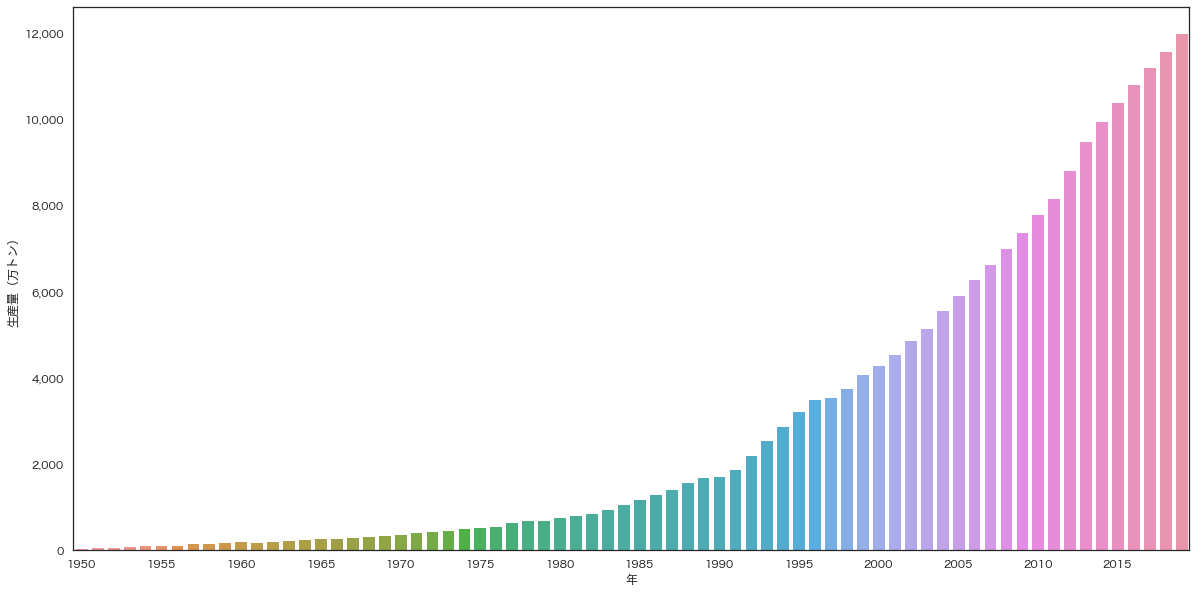

In [20]:
sns.set(style='white', font=['MS Gothic','Hiragino Sans']) # 日本語フォントは設定が必要

plt.figure(figsize=(20,10))
ax = sns.barplot(x='PERIOD', y='VALUE', data=world_quantity_groupby_year)

ax.set_xlabel("年")
ax.xaxis.set_major_locator(ticker.MultipleLocator(5)) # 5年刻み

ax.set_ylabel("生産量（万トン）");
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10_000))) # 万単位

### 3. データフレームを縦に連結する

今度は国別の養殖業の生産量の推移を積み上げ折れ線グラフで表示してみましょう。  
最近年での上位の国とそれ以外の国を1つにまとめたものを対象とします。

まず最新年を取得します。

In [21]:
year_max = quantity_country_species_df['PERIOD'].max()

まず上位20位の国を取得してみます。

In [22]:
top20_countries_in_2019_df = quantity_country_species_df[quantity_country_species_df['PERIOD'] == year_max] \
                            .groupby('COUNTRY.Name_En')['VALUE'].sum().reset_index() \
                            .sort_values('VALUE', ascending=False)[:20]

top20_countries_in_2019_df

,COUNTRY.Name_En,VALUE
39,China,6.842386e+07
87,Indonesia,1.589340e+07
86,India,7.800300e+06
200,Viet Nam,4.455557e+06
14,Bangladesh,2.488600e+06
100,"Korea, Republic of",2.406351e+06
146,Philippines,2.358238e+06
55,Egypt,1.641949e+06
137,Norway,1.453042e+06
38,Chile,1.407286e+06


日本が13位にいるのと、14位から数字が大きく下がるので、今回は上位13位までを対象にします。

上位13位の国名のリストを取得します。

In [23]:
top13_countries = top20_countries_in_2019_df[:13]['COUNTRY.Name_En'].tolist()

top13_countries

['China',
 'Indonesia',
 'India',
 'Viet Nam',
 'Bangladesh',
 'Korea, Republic of',
 'Philippines',
 'Egypt',
 'Norway',
 'Chile',
 'Myanmar',
 'Thailand',
 'Japan']

生産量を13ヶ国に絞り、国と年でグループ化して各年の生産量を計算した`Series`オブジェクトを作成します。

In [24]:
top13_quantity_groupby_year_s = quantity_country_species_df[ \
                              quantity_country_species_df['COUNTRY.Name_En'].isin(top13_countries)] \
                              .groupby(['COUNTRY.Name_En', 'PERIOD'])['VALUE'] \
                              .sum()

top13_quantity_groupby_year_s

COUNTRY.Name_En  PERIOD
Bangladesh       1950        37855.00
                 1951        38853.00
                 1952        39875.00
                 1953        40932.00
                 1954        42018.00
                              ...    
Viet Nam         2015      3475449.61
                 2016      3581579.03
                 2017      3831777.05
                 2018      4162822.50
                 2019      4455557.00
Name: VALUE, Length: 910, dtype: float64

次に`その他`の年ごとの生産量を計算した`Series`オブジェクトを作成します。

先ほどの世界生産量から13ヶ国の生産量の合計を引いて計算します。

In [25]:
the_others_capture_groupby_year_s = world_quantity_groupby_year.set_index('PERIOD')['VALUE'] - \
                                    top13_quantity_groupby_year_s.groupby('PERIOD').sum()

the_others_capture_groupby_year_s

PERIOD
1950     327691.000
1951     354605.000
1952     356314.000
1953     401844.000
1954     402739.000
           ...     
2015    7410795.903
2016    7515478.147
2017    7874705.170
2018    8206831.909
2019    8779671.956
Name: VALUE, Length: 70, dtype: float64

作成した`Series`オブジェクトを13ヶ国の`Series`オブジェクトを結合しますので、同じ階層型インデックス(multiindex)を持つように変形します。

インデックスを一旦リセットしてから国名の列を追加し、改めて２つの列をインデックスにしましょう。

国名は`その他`にします。

In [26]:
the_others_capture_groupby_year_s = the_others_capture_groupby_year_s.reset_index()

the_others_capture_groupby_year_s['COUNTRY.Name_En'] = 'その他'

the_others_capture_groupby_year_s = the_others_capture_groupby_year_s \
                                    .set_index(['COUNTRY.Name_En',  'PERIOD'])['VALUE']

the_others_capture_groupby_year_s

COUNTRY.Name_En  PERIOD
その他              1950       327691.000
                 1951       354605.000
                 1952       356314.000
                 1953       401844.000
                 1954       402739.000
                              ...     
                 2015      7410795.903
                 2016      7515478.147
                 2017      7874705.170
                 2018      8206831.909
                 2019      8779671.956
Name: VALUE, Length: 70, dtype: float64

13ヶ国のSeriesオブジェクトと`その他`のSeriesオブジェクトを`concat()`で縦に連結します。

In [27]:
top13_the_others_quantity_s = pd.concat([top13_quantity_groupby_year_s, the_others_capture_groupby_year_s])

top13_the_others_quantity_s

COUNTRY.Name_En  PERIOD
Bangladesh       1950        37855.000
                 1951        38853.000
                 1952        39875.000
                 1953        40932.000
                 1954        42018.000
                              ...     
その他              2015      7410795.903
                 2016      7515478.147
                 2017      7874705.170
                 2018      8206831.909
                 2019      8779671.956
Name: VALUE, Length: 980, dtype: float64

最後に、年に抜けがないか確認しましょう。

生成した`Series`オブジェクトを国ごとにグループ化し、各国の年の件数、最大値、最小値を表示してみます。

In [28]:
top13_the_others_quantity_s.reset_index('PERIOD') \
                            .groupby('COUNTRY.Name_En')['PERIOD'] \
                            .agg(['size', 'min', 'max'])

,size,min,max
COUNTRY.Name_En,,,
Bangladesh,70,1950,2019
Chile,70,1950,2019
China,70,1950,2019
Egypt,70,1950,2019
India,70,1950,2019
Indonesia,70,1950,2019
Japan,70,1950,2019
"Korea, Republic of",70,1950,2019
Myanmar,70,1950,2019


`seaborn`には積み上げ折れ線グラフはありませんので、`matplotlib`の`stackplot()`を利用します。

データフレームを変形して、stackplotの引数に合うよう以下に分解する必要があります。

1. 年のリスト
2. （国の数）X（年の数）の二次元の生産量のリスト
3. ラベル用の国名の配列

まずはSeriesオブジェクトのインデックスを外してデータフレームにします。

In [29]:
top13_the_others_quantity_df = top13_the_others_quantity_s.reset_index()

top13_the_others_quantity_df

,COUNTRY.Name_En,PERIOD,VALUE
0,Bangladesh,1950,37855.000
1,Bangladesh,1951,38853.000
2,Bangladesh,1952,39875.000
3,Bangladesh,1953,40932.000
4,Bangladesh,1954,42018.000
...,...,...,...
975,その他,2015,7410795.903
976,その他,2016,7515478.147
977,その他,2017,7874705.170
978,その他,2018,8206831.909


年のリストを取得します。

In [30]:
years = top13_the_others_quantity_df['PERIOD'].unique()

print(f"年の件数: {len(years)}件")

years

年の件数: 70件


array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

次は二次元の生産量のリストを取得したいところなのですが、データフレームを見ると生産量の多い順であった国の順番が狂ってしまっています。  
先にラベル用の国名のリストを生成し、それに合わせて順序を整えるようにします。

先ほど作成した上位13ヶ国の国名のリストに`その他`を加え、ラベル用の国名リストを生成します。

In [31]:
top13_countries_and_the_others = top13_countries + ["その他"]

top13_countries_and_the_others

['China',
 'Indonesia',
 'India',
 'Viet Nam',
 'Bangladesh',
 'Korea, Republic of',
 'Philippines',
 'Egypt',
 'Norway',
 'Chile',
 'Myanmar',
 'Thailand',
 'Japan',
 'その他']

データフレームを国名でソートできるよう`COUNTRY.Name_En`のデータ型を`category`とし、カテゴリとして先ほどの国名リストを設定します。

In [32]:
top13_the_others_quantity_df['COUNTRY.Name_En']= \
    top13_the_others_quantity_df['COUNTRY.Name_En'].astype('category')

top13_the_others_quantity_df['COUNTRY.Name_En'] = \
    top13_the_others_quantity_df['COUNTRY.Name_En'].cat.reorder_categories(top13_countries_and_the_others)

top13_the_others_quantity_df['COUNTRY.Name_En']

0      Bangladesh
1      Bangladesh
2      Bangladesh
3      Bangladesh
4      Bangladesh
          ...    
975           その他
976           その他
977           その他
978           その他
979           その他
Name: COUNTRY.Name_En, Length: 980, dtype: category
Categories (14, object): ['China', 'Indonesia', 'India', 'Viet Nam', ..., 'Myanmar', 'Thailand', 'Japan', 'その他']

ソートする準備が調ったので、データフレームを国名、年でソートします。

In [33]:
top13_the_others_quantity_df = top13_the_others_quantity_df.sort_values(['COUNTRY.Name_En', 'PERIOD'])

top13_the_others_quantity_df

,COUNTRY.Name_En,PERIOD,VALUE
140,China,1950,75961.000
141,China,1951,147193.000
142,China,1952,196444.000
143,China,1953,252930.000
144,China,1954,367849.000
...,...,...,...
975,その他,2015,7410795.903
976,その他,2016,7515478.147
977,その他,2017,7874705.170
978,その他,2018,8206831.909


それでは二次元の生産量のリストを取得します。

国でグループ化してからグループごとに`apply()`で生産量をリスト化し、最後にそれらを１つのリストにします。

In [34]:
values = top13_the_others_quantity_df.groupby('COUNTRY.Name_En')['VALUE'].apply(list).tolist()

print(f"各次元の要素数: {np.shape(values)}")

各次元の要素数: (14, 70)


ではグラフを表示しましょう。

どんなことが読み取れますか？

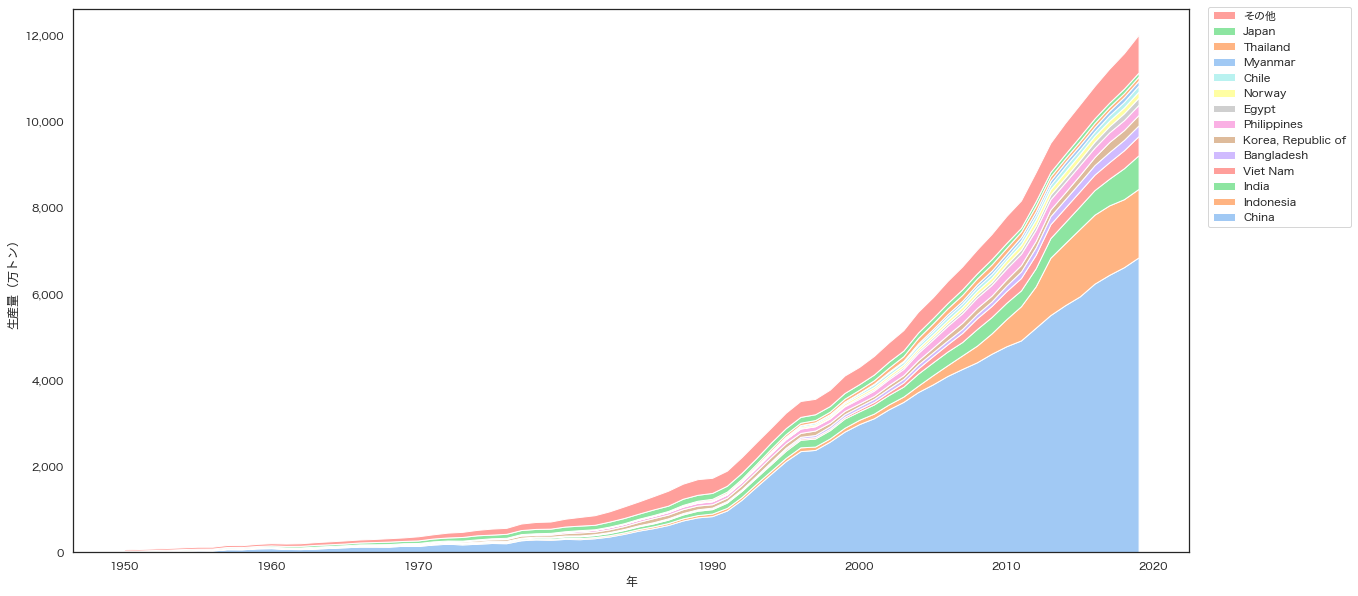

In [35]:
sns.set_palette('pastel')

fig, ax = plt.subplots(figsize=(20,10))
plt.stackplot(years, values, labels=top13_countries_and_the_others)

ax.set_xlabel("年")

ax.set_ylabel("生産量（万トン）");
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10_000))) # 万単位

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc="upper left", bbox_to_anchor=(1.012, 1.014)) # ラベルの順序を逆さにする

### 4. 過去・未来のデータとの結合

ここでは増加率と移動平均を取得する目的で、過去および未来のデータとの結合をおこないます。

#### 4-1. 過去の1件前のデータを取得

先ほどの国別の養殖業の生産量のグラフでは中国以外の増減がやや読みにくいので、各国の増加率の折れ線グラフを表示します。

グラフ用のデータフレームの作成手順は以下のようになります。
1. 先ほどのグラフ用のデータフレームに各国の各年ごとに前年の生産量の値を新たな列`VALUE_previous_year`に格納する。
2. 前年・当年の生産量から増加率を計算し、新たな列`increase_rate`に格納する。

まずデータを年度の昇順にソートします。

普通にソートしても良いのですが、必要最低限のソートになるよう、グループ単位でソートします。

In [36]:
top13_the_others_quantity_df_sorted = top13_the_others_quantity_df \
                                       .groupby('COUNTRY.Name_En') \
                                       .apply(lambda g: g.sort_values('PERIOD'))

top13_the_others_quantity_df_sorted

,COUNTRY.Name_En,PERIOD,VALUE
140,China,1950,75961.000
141,China,1951,147193.000
142,China,1952,196444.000
143,China,1953,252930.000
144,China,1954,367849.000
...,...,...,...
975,その他,2015,7410795.903
976,その他,2016,7515478.147
977,その他,2017,7874705.170
978,その他,2018,8206831.909


次に`groupby()`で魚種でグループ化した`DataFrameGroupBy`オブジェクトを作成後、`shift()`を実行します。  

前年の生産量を求めたいので、`shift()`の引数に`periods=1`を指定します。

In [37]:
top13_the_others_previous_year_s = top13_the_others_quantity_df_sorted \
                          .groupby('COUNTRY.Name_En')['VALUE'] \
                          .shift(periods=1)

top13_the_others_previous_year_s

140            NaN
141      75961.000
142     147193.000
143     196444.000
144     252930.000
          ...     
975    7232099.252
976    7410795.903
977    7515478.147
978    7874705.170
979    8206831.909
Name: VALUE, Length: 980, dtype: float64

作成した`Series`を元のデータフレームに`VALUE_previous_year`列として加えます。

In [38]:
top13_the_others_quantity_df['VALUE_previous_year'] = top13_the_others_previous_year_s

top13_the_others_quantity_df

,COUNTRY.Name_En,PERIOD,VALUE,VALUE_previous_year
140,China,1950,75961.000,NaN
141,China,1951,147193.000,75961.000
142,China,1952,196444.000,147193.000
143,China,1953,252930.000,196444.000
144,China,1954,367849.000,252930.000
...,...,...,...,...
975,その他,2015,7410795.903,7232099.252
976,その他,2016,7515478.147,7410795.903
977,その他,2017,7874705.170,7515478.147
978,その他,2018,8206831.909,7874705.170


さらに、前年・当年の生産量から増加率を計算し、新たな列`increase_rate`に格納します。

増加率は小数点第一で丸めます。

In [39]:
top13_the_others_quantity_df['increase_rate'] = round( \
 (top13_the_others_quantity_df['VALUE'] / top13_the_others_quantity_df['VALUE_previous_year'] - 1) * 100)

top13_the_others_quantity_df

,COUNTRY.Name_En,PERIOD,VALUE,VALUE_previous_year,increase_rate
140,China,1950,75961.000,NaN,NaN
141,China,1951,147193.000,75961.000,94.0
142,China,1952,196444.000,147193.000,33.0
143,China,1953,252930.000,196444.000,29.0
144,China,1954,367849.000,252930.000,45.0
...,...,...,...,...,...
975,その他,2015,7410795.903,7232099.252,2.0
976,その他,2016,7515478.147,7410795.903,1.0
977,その他,2017,7874705.170,7515478.147,5.0
978,その他,2018,8206831.909,7874705.170,4.0


念のため、ミャンマーのデータで移動平均が正しく計算されているか確認します。

In [40]:
top13_the_others_quantity_df.query('`COUNTRY.Name_En` == "Myanmar"') # 「.」が含まれているのバッククォートで囲む

,COUNTRY.Name_En,PERIOD,VALUE,VALUE_previous_year,increase_rate
560,Myanmar,1950,0.000,NaN,NaN
561,Myanmar,1951,1.000,0.000,inf
562,Myanmar,1952,2.000,1.000,100.0
563,Myanmar,1953,2.000,2.000,0.0
564,Myanmar,1954,5.000,2.000,150.0
...,...,...,...,...,...
625,Myanmar,2015,999630.023,964255.830,4.0
626,Myanmar,2016,1017644.298,999630.023,2.0
627,Myanmar,2017,1048863.265,1017644.298,3.0
628,Myanmar,2018,1131706.054,1048863.265,8.0


計算は合っていそうですが、`inf`があります。  
何が原因でしょうか？

`inf`がいくつあるのか確認します。

In [41]:
np.isinf(top13_the_others_quantity_df['increase_rate']).sum()

3

`inf`を`NaN`に置き換えてしまってもいいのですが、そもそもの計算の仕方が悪かったので、もう一度やり直します。

In [42]:
top13_the_others_quantity_df['increase_rate'] = top13_the_others_quantity_df.apply( \
    lambda x: round((x['VALUE'] / x['VALUE_previous_year'] - 1) * 100, 1) \
                if x['VALUE_previous_year'] > 0 else np.NaN, axis=1)

top13_the_others_quantity_df

,COUNTRY.Name_En,PERIOD,VALUE,VALUE_previous_year,increase_rate
140,China,1950,75961.000,NaN,NaN
141,China,1951,147193.000,75961.000,93.8
142,China,1952,196444.000,147193.000,33.5
143,China,1953,252930.000,196444.000,28.8
144,China,1954,367849.000,252930.000,45.4
...,...,...,...,...,...
975,その他,2015,7410795.903,7232099.252,2.5
976,その他,2016,7515478.147,7410795.903,1.4
977,その他,2017,7874705.170,7515478.147,4.8
978,その他,2018,8206831.909,7874705.170,4.2


もう一度`inf`がいくつあるのか確認します。

In [43]:
np.isinf(top13_the_others_quantity_df['increase_rate']).sum()

0

それでは増加率の折れ線グラフを表示します。

どんなことが読み取れますか？

In [44]:
### チャレンジしてみましょう！！ ###

かなり突出した数値が幾つかあります。  
データを確認してみます。

In [45]:
top13_the_others_quantity_df[top13_the_others_quantity_df['increase_rate'] > 100]

,COUNTRY.Name_En,PERIOD,VALUE,VALUE_previous_year,increase_rate
503,"Korea, Republic of",1963,80479.0,23901.0,236.7
644,Norway,1964,601.0,100.0,501.0
104,Chile,1984,8611.0,1972.0,336.7
108,Chile,1988,32349.0,13936.0,132.1
564,Myanmar,1954,5.0,2.0,150.0
602,Myanmar,1992,25954.0,8822.0,194.2


突出した数値となった原因について、簡単に調査してみましょう。

In [46]:
### チャレンジしてみましょう！！ ###

ここからは魚種別の生産量の推移を分析していきます。

魚種の分類方法がいくつかあるようですが、今回はISSCAAP（水棲動植物国際標準統計分類）で分類します。

まずは上位20位の魚種を取得します。

In [47]:
top20_species_s = quantity_country_species_df[quantity_country_species_df['PERIOD'] == year_max] \
                  .groupby('ISSCAAP_Group_En')['VALUE'].sum().sort_values(ascending=False)[:20]

top20_species_s

ISSCAAP_Group_En
Carps, barbels and other cyprinids    2.978936e+07
Red seaweeds                          1.825147e+07
Brown seaweeds                        1.639376e+07
Miscellaneous freshwater fishes       1.125523e+07
Shrimps, prawns                       6.555315e+06
Tilapias and other cichlids           6.194760e+06
Oysters                               6.125606e+06
Clams, cockles, arkshells             5.522876e+06
Salmons, trouts, smelts               3.855434e+06
Freshwater crustaceans                3.475442e+06
Mussels                               2.068508e+06
Scallops, pectens                     2.066570e+06
Miscellaneous coastal fishes          1.786319e+06
Miscellaneous diadromous fishes       1.645090e+06
Miscellaneous marine molluscs         1.121559e+06
Marine fishes not identified          7.521980e+05
Abalones, winkles, conchs             4.499891e+05
Crabs, sea-spiders                    4.473716e+05
Miscellaneous pelagic fishes          3.956314e+05
Turtles       

11位以降は数字が大きく下がることもあり、今回は上位10位までを対象とします。  
ただし「Miscellaneous freshwater fishes」「Freshwater crustaceans」は特定の種ではないので、この２つを除いた8種を対象とします。

上位8位の国名のリストを取得します。

In [48]:
top10_species_s = top20_species_s[:10]

top8_species_s = top10_species_s.loc[
    ~top10_species_s.index.isin(['Miscellaneous freshwater fishes', 'Freshwater crustaceans'])]

top8_species = top8_species_s.index.tolist()

top8_species

['Carps, barbels and other cyprinids',
 'Red seaweeds',
 'Brown seaweeds',
 'Shrimps, prawns',
 'Tilapias and other cichlids',
 'Oysters',
 'Clams, cockles, arkshells',
 'Salmons, trouts, smelts']

生産量を8種に絞り、種類と年でグループ化して各年の生産量を計算した`Series`オブジェクトを作成します。

In [49]:
top8_quantity_groupby_year_s = quantity_country_species_df[ \
                                quantity_country_species_df['ISSCAAP_Group_En'].isin(top8_species)] \
                                .groupby(['ISSCAAP_Group_En', 'PERIOD'])['VALUE'] \
                                .sum()

top8_quantity_groupby_year_s

ISSCAAP_Group_En             PERIOD
Brown seaweeds               1950        13141.000
                             1951        11256.000
                             1952        10863.000
                             1953        11854.000
                             1954        13636.000
                                          ...     
Tilapias and other cichlids  2015      5461139.581
                             2016      5589588.419
                             2017      5924824.078
                             2018      6035858.659
                             2019      6194759.888
Name: VALUE, Length: 560, dtype: float64

年に抜けがないか確認しましょう。

生成した`Series`オブジェクトを国ごとにグループ化し、各国の年の件数、最大値、最小値を表示してみます。

In [50]:
top8_quantity_groupby_year_s.reset_index('PERIOD') \
                            .groupby('ISSCAAP_Group_En')['PERIOD'] \
                            .agg(['size', 'min', 'max'])

,size,min,max
ISSCAAP_Group_En,,,
Brown seaweeds,70,1950,2019
"Carps, barbels and other cyprinids",70,1950,2019
"Clams, cockles, arkshells",70,1950,2019
Oysters,70,1950,2019
Red seaweeds,70,1950,2019
"Salmons, trouts, smelts",70,1950,2019
"Shrimps, prawns",70,1950,2019
Tilapias and other cichlids,70,1950,2019


グラフ表示の関数の引数に合わせるため、インデックスをすべてリセットします。

In [51]:
top8_quantity_df = top8_quantity_groupby_year_s.reset_index()

top8_quantity_df

,ISSCAAP_Group_En,PERIOD,VALUE
0,Brown seaweeds,1950,13141.000
1,Brown seaweeds,1951,11256.000
2,Brown seaweeds,1952,10863.000
3,Brown seaweeds,1953,11854.000
4,Brown seaweeds,1954,13636.000
...,...,...,...
555,Tilapias and other cichlids,2015,5461139.581
556,Tilapias and other cichlids,2016,5589588.419
557,Tilapias and other cichlids,2017,5924824.078
558,Tilapias and other cichlids,2018,6035858.659


英語の魚名はあまり馴染みなく分かりにくいので、対応する日本語と中国語の訳を用意しました。   
英語・中国語・日本語のデータフレームを作成し、それを8種の生産量データフレームに結合します。

|SPECIES.Name_En|SPECIES.Name_Cn|SPECIES.Name_Jp|
|:---|:---|:---|
|Carps, barbels and other cyprinids|鲤鱼・鲫鱼|コイ・フナ類|
|Red seaweeds|红藻|紅藻類（ノリ等）|
|Brown seaweeds|褐藻|褐藻類（コンブ等）|
|Shrimps, prawns|虾|エビ類|
|Tilapias and other cichlids|罗非鱼|ティラピア類|
|Oysters|牡蛎|カキ類|
|Clams, cockles, arkshells|蛤仔・蛤蜊|アサリ・ハマグリ類|
|Salmons, trouts, smelts|鲑鱼・鳟鱼|サケ・マス類|

まず英語・中国語・日本語のデータフレームを作成します。

In [52]:
isscaap_group_df = pd.DataFrame([
        ['Carps, barbels and other cyprinids', '鲤鱼・鲫鱼', 'コイ・フナ類'],
        ['Red seaweeds', '红藻', '紅藻類（ノリ等）'],
        ['Brown seaweeds', '褐藻', '褐藻類（コンブ等）'],
        ['Shrimps, prawns', '虾', 'エビ類'],
        ['Tilapias and other cichlids', '罗非鱼', 'ティラピア類'],
        ['Oysters', '牡蛎', 'カキ類'],
        ['Clams, cockles, arkshells', '蛤仔・蛤蜊', 'アサリ・ハマグリ類'],
        ['Salmons, trouts, smelts', '鲑鱼・鳟鱼', 'サケ・マス類']],
    columns=['ISSCAAP_Group_En', 'ISSCAAP_Group_Cn', 'ISSCAAP_Group_Jp'])

isscaap_group_df

,ISSCAAP_Group_En,ISSCAAP_Group_Cn,ISSCAAP_Group_Jp
0,"Carps, barbels and other cyprinids",鲤鱼・鲫鱼,コイ・フナ類
1,Red seaweeds,红藻,紅藻類（ノリ等）
2,Brown seaweeds,褐藻,褐藻類（コンブ等）
3,"Shrimps, prawns",虾,エビ類
4,Tilapias and other cichlids,罗非鱼,ティラピア類
5,Oysters,牡蛎,カキ類
6,"Clams, cockles, arkshells",蛤仔・蛤蜊,アサリ・ハマグリ類
7,"Salmons, trouts, smelts",鲑鱼・鳟鱼,サケ・マス類


作成したデータフレームを8種の生産量データフレームに結合します。

In [53]:
top8_quantity_df = pd.merge(top8_quantity_df, isscaap_group_df, on='ISSCAAP_Group_En', how='left')

top8_quantity_df

,ISSCAAP_Group_En,PERIOD,VALUE,ISSCAAP_Group_Cn,ISSCAAP_Group_Jp
0,Brown seaweeds,1950,13141.000,褐藻,褐藻類（コンブ等）
1,Brown seaweeds,1951,11256.000,褐藻,褐藻類（コンブ等）
2,Brown seaweeds,1952,10863.000,褐藻,褐藻類（コンブ等）
3,Brown seaweeds,1953,11854.000,褐藻,褐藻類（コンブ等）
4,Brown seaweeds,1954,13636.000,褐藻,褐藻類（コンブ等）
...,...,...,...,...,...
555,Tilapias and other cichlids,2015,5461139.581,罗非鱼,ティラピア類
556,Tilapias and other cichlids,2016,5589588.419,罗非鱼,ティラピア類
557,Tilapias and other cichlids,2017,5924824.078,罗非鱼,ティラピア類
558,Tilapias and other cichlids,2018,6035858.659,罗非鱼,ティラピア類


最後に魚種でソートできるよう、`ISSCAAP_Group_En`のデータ型を`category`とし、カテゴリとして先ほどの魚種のリストを設定します。

In [54]:
top8_quantity_df['ISSCAAP_Group_En'] = top8_quantity_df['ISSCAAP_Group_En'].astype('category')

top8_quantity_df['ISSCAAP_Group_En'] = top8_quantity_df['ISSCAAP_Group_En'].cat.reorder_categories(top8_species)

top8_quantity_df['ISSCAAP_Group_En']

0                   Brown seaweeds
1                   Brown seaweeds
2                   Brown seaweeds
3                   Brown seaweeds
4                   Brown seaweeds
                  ...             
555    Tilapias and other cichlids
556    Tilapias and other cichlids
557    Tilapias and other cichlids
558    Tilapias and other cichlids
559    Tilapias and other cichlids
Name: ISSCAAP_Group_En, Length: 560, dtype: category
Categories (8, object): ['Carps, barbels and other cyprinids', 'Red seaweeds', 'Brown seaweeds', 'Shrimps, prawns', 'Tilapias and other cichlids', 'Oysters', 'Clams, cockles, arkshells', 'Salmons, trouts, smelts']

ソートする準備が調ったので、データフレームを魚種、年でソートします。

In [55]:
top8_quantity_df = top8_quantity_df.sort_values(['ISSCAAP_Group_En', 'PERIOD'])

top8_quantity_df

,ISSCAAP_Group_En,PERIOD,VALUE,ISSCAAP_Group_Cn,ISSCAAP_Group_Jp
70,"Carps, barbels and other cyprinids",1950,172482.000,鲤鱼・鲫鱼,コイ・フナ類
71,"Carps, barbels and other cyprinids",1951,221295.000,鲤鱼・鲫鱼,コイ・フナ類
72,"Carps, barbels and other cyprinids",1952,244058.000,鲤鱼・鲫鱼,コイ・フナ類
73,"Carps, barbels and other cyprinids",1953,299557.000,鲤鱼・鲫鱼,コイ・フナ類
74,"Carps, barbels and other cyprinids",1954,411509.000,鲤鱼・鲫鱼,コイ・フナ類
...,...,...,...,...,...
415,"Salmons, trouts, smelts",2015,3396751.637,鲑鱼・鳟鱼,サケ・マス類
416,"Salmons, trouts, smelts",2016,3332143.122,鲑鱼・鳟鱼,サケ・マス類
417,"Salmons, trouts, smelts",2017,3496821.616,鲑鱼・鳟鱼,サケ・マス類
418,"Salmons, trouts, smelts",2018,3552451.599,鲑鱼・鳟鱼,サケ・マス類


グラフを表示します。

どんなことが読み取れますか？

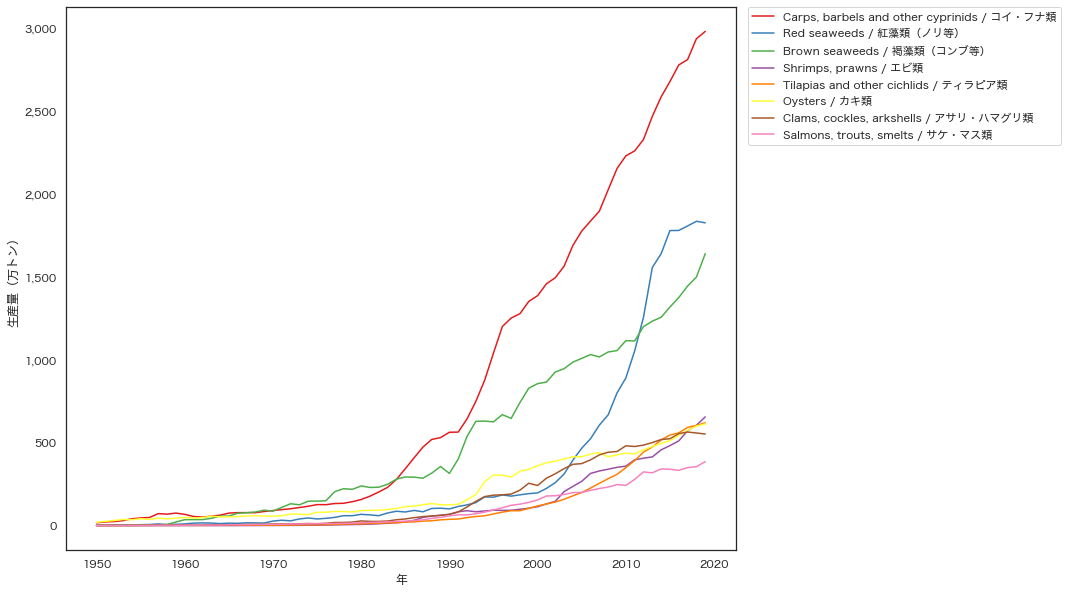

In [66]:
fig, ax = plt.subplots(figsize=(12,10))

sns.lineplot(x='PERIOD', y='VALUE', hue='ISSCAAP_Group_En', data=top8_quantity_df)

ax.set_xlabel("年")

ax.set_ylabel("生産量（万トン）");
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10_000))) # 万単位

# 言語混合ラベル
# 中国語を表示するにはOSにフォントのインストールが必要
labels = top8_quantity_df['ISSCAAP_Group_En'].cat.categories + ' / ' \
          + top8_quantity_df['ISSCAAP_Group_Jp'].unique()
ax.legend(labels, loc="upper left", bbox_to_anchor=(1.01, 1.01))

#### 4-2. 移動平均の取得

8魚種のうち上位以外の魚種は線の上下が激しく交差も多いので、見やすいように5年間の単純移動平均を求めてグラフに表示してみます。

グラフ表示に必要なデータフレームの作成手順は以下のようになります。
1. 魚種単位で年度の昇順にソートする。
2. `rolling()`を使って各行ごとに自身と前後の行の平均、つまり5年間の単純移動平均を計算したデータフレームを作成。
3. 元のデータフレームに単純移動平均のデータフレームを結合。

まずデータを年度の昇順にソートします。

先ほどと同じように、必要最低限のソートになるよう、グループ単位でソートします。

In [57]:
top8_quantity_df_sorted = top8_quantity_df.groupby('ISSCAAP_Group_En').apply(lambda g: g.sort_values('PERIOD'))

top8_quantity_df_sorted

,ISSCAAP_Group_En,PERIOD,VALUE,ISSCAAP_Group_Cn,ISSCAAP_Group_Jp
70,"Carps, barbels and other cyprinids",1950,172482.000,鲤鱼・鲫鱼,コイ・フナ類
71,"Carps, barbels and other cyprinids",1951,221295.000,鲤鱼・鲫鱼,コイ・フナ類
72,"Carps, barbels and other cyprinids",1952,244058.000,鲤鱼・鲫鱼,コイ・フナ類
73,"Carps, barbels and other cyprinids",1953,299557.000,鲤鱼・鲫鱼,コイ・フナ類
74,"Carps, barbels and other cyprinids",1954,411509.000,鲤鱼・鲫鱼,コイ・フナ類
...,...,...,...,...,...
415,"Salmons, trouts, smelts",2015,3396751.637,鲑鱼・鳟鱼,サケ・マス類
416,"Salmons, trouts, smelts",2016,3332143.122,鲑鱼・鳟鱼,サケ・マス類
417,"Salmons, trouts, smelts",2017,3496821.616,鲑鱼・鳟鱼,サケ・マス類
418,"Salmons, trouts, smelts",2018,3552451.599,鲑鱼・鳟鱼,サケ・マス類


次に`groupby()`で魚種でグループ化した`DataFrameGroupBy`オブジェクトを作成後、`rolling()`を実行します。  

自身の行を真ん中として前後2行ずつの3行の平均を求めたいので、`rolling()`の引数に`window=5`、`center=True`を指定し、`mean()`を実行します。

In [58]:
top8_moving_average_s = top8_quantity_df_sorted \
                          .groupby('ISSCAAP_Group_En')['VALUE'] \
                          .rolling(window=5, center=True) \
                          .mean()

top8_moving_average_s

ISSCAAP_Group_En                       
Carps, barbels and other cyprinids  70              NaN
                                    71              NaN
                                    72     2.697802e+05
                                    73     3.277320e+05
                                    74     3.814544e+05
                                               ...     
Salmons, trouts, smelts             415    3.365197e+06
                                    416    3.439186e+06
                                    417    3.526720e+06
                                    418             NaN
                                    419             NaN
Name: VALUE, Length: 560, dtype: float64

作成した5年移動平均のデータフレームを元のデータフレームと結合したいので、２つのインデックスのうち`ISSCAAP_Group_En`の方を削除します。

In [59]:
top8_moving_average_s.reset_index(level='ISSCAAP_Group_En', drop=True, inplace=True)

top8_moving_average_s

70              NaN
71              NaN
72     2.697802e+05
73     3.277320e+05
74     3.814544e+05
           ...     
415    3.365197e+06
416    3.439186e+06
417    3.526720e+06
418             NaN
419             NaN
Name: VALUE, Length: 560, dtype: float64

作成した`Series`を元のデータフレームに`VALUE_移動平均_5年`列として加えます。

In [60]:
top8_quantity_df_sorted['VALUE_移動平均_5年'] = top8_moving_average_s

top8_quantity_df_sorted

,ISSCAAP_Group_En,PERIOD,VALUE,ISSCAAP_Group_Cn,ISSCAAP_Group_Jp,VALUE_移動平均_5年
70,"Carps, barbels and other cyprinids",1950,172482.000,鲤鱼・鲫鱼,コイ・フナ類,NaN
71,"Carps, barbels and other cyprinids",1951,221295.000,鲤鱼・鲫鱼,コイ・フナ類,NaN
72,"Carps, barbels and other cyprinids",1952,244058.000,鲤鱼・鲫鱼,コイ・フナ類,2.697802e+05
73,"Carps, barbels and other cyprinids",1953,299557.000,鲤鱼・鲫鱼,コイ・フナ類,3.277320e+05
74,"Carps, barbels and other cyprinids",1954,411509.000,鲤鱼・鲫鱼,コイ・フナ類,3.814544e+05
...,...,...,...,...,...,...
415,"Salmons, trouts, smelts",2015,3396751.637,鲑鱼・鳟鱼,サケ・マス類,3.365197e+06
416,"Salmons, trouts, smelts",2016,3332143.122,鲑鱼・鳟鱼,サケ・マス類,3.439186e+06
417,"Salmons, trouts, smelts",2017,3496821.616,鲑鱼・鳟鱼,サケ・マス類,3.526720e+06
418,"Salmons, trouts, smelts",2018,3552451.599,鲑鱼・鳟鱼,サケ・マス類,NaN


念のため、`サケ・マス類`のデータを年でソートし、移動平均が正しく計算されているか確認します。

In [61]:
top8_quantity_df_sorted.query('ISSCAAP_Group_En == "Salmons, trouts, smelts"').sort_values('PERIOD')

,ISSCAAP_Group_En,PERIOD,VALUE,ISSCAAP_Group_Cn,ISSCAAP_Group_Jp,VALUE_移動平均_5年
350,"Salmons, trouts, smelts",1950,7157.000,鲑鱼・鳟鱼,サケ・マス類,NaN
351,"Salmons, trouts, smelts",1951,7727.000,鲑鱼・鳟鱼,サケ・マス類,NaN
352,"Salmons, trouts, smelts",1952,8422.000,鲑鱼・鳟鱼,サケ・マス類,8.545600e+03
353,"Salmons, trouts, smelts",1953,9179.000,鲑鱼・鳟鱼,サケ・マス類,9.633600e+03
354,"Salmons, trouts, smelts",1954,10243.000,鲑鱼・鳟鱼,サケ・マス類,1.104720e+04
...,...,...,...,...,...,...
415,"Salmons, trouts, smelts",2015,3396751.637,鲑鱼・鳟鱼,サケ・マス類,3.365197e+06
416,"Salmons, trouts, smelts",2016,3332143.122,鲑鱼・鳟鱼,サケ・マス類,3.439186e+06
417,"Salmons, trouts, smelts",2017,3496821.616,鲑鱼・鳟鱼,サケ・マス類,3.526720e+06
418,"Salmons, trouts, smelts",2018,3552451.599,鲑鱼・鳟鱼,サケ・マス類,NaN


それでは8魚種の生産量の推移とその5年移動平均の2つの折れ線グラフを表示します。

どんなことが読み取れますか？

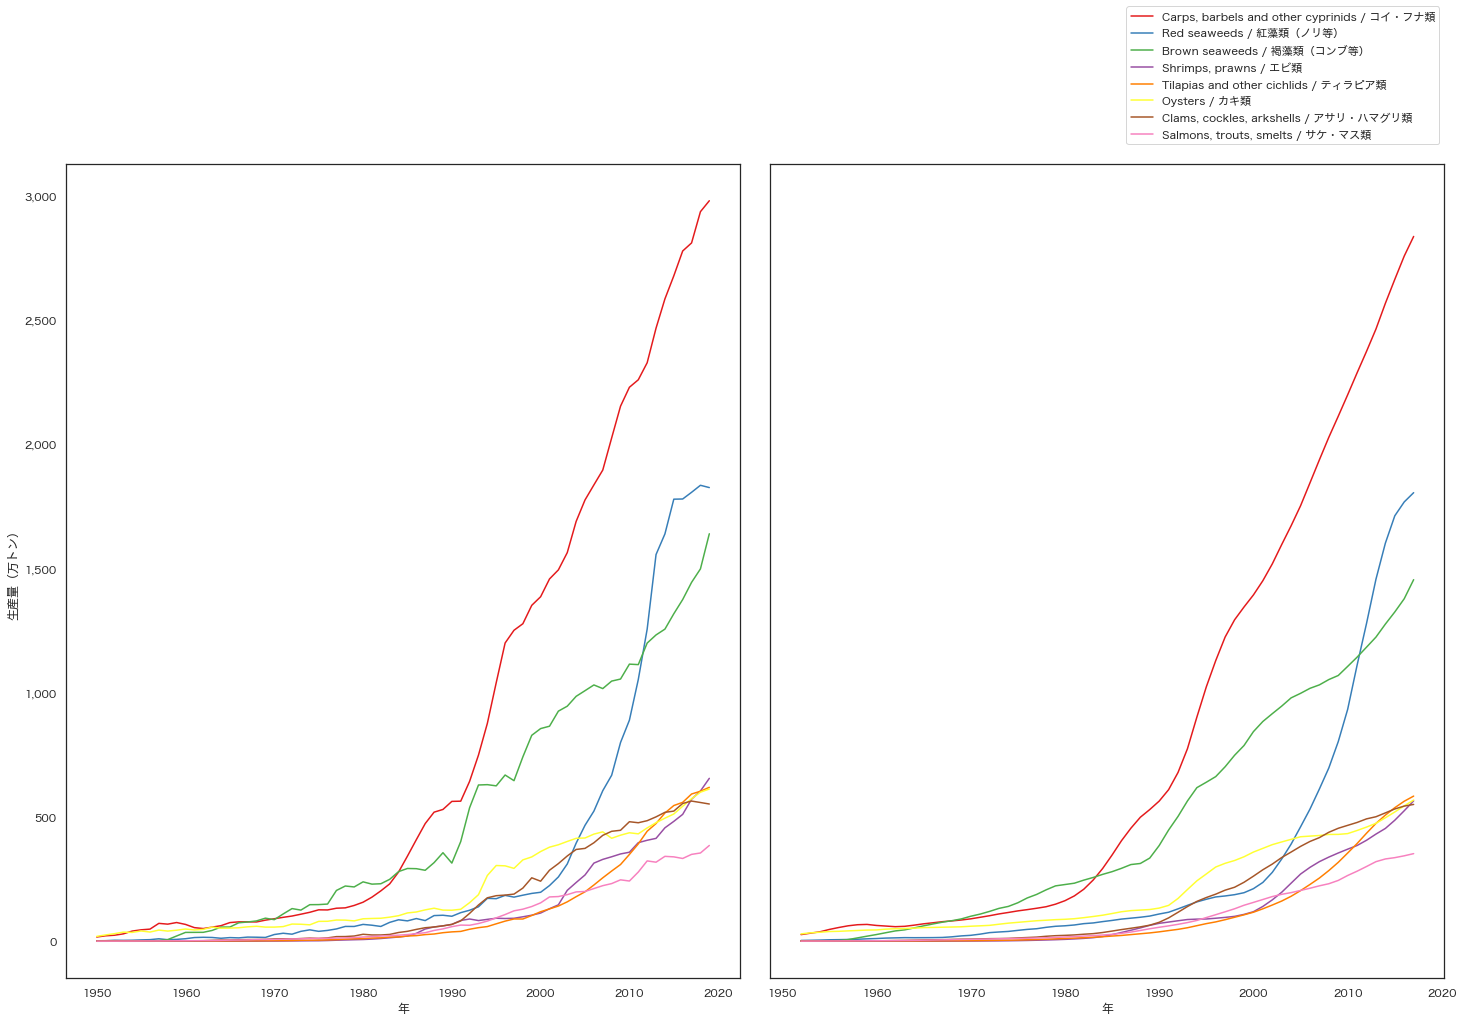

In [65]:
sns.set_palette('Set1') # 区別しやすいように色のセットを変更

fig, axes = plt.subplots(1, 2, figsize=(20,12), sharey=True)
fig.tight_layout()

# 通常のグラフ
sns.lineplot(x='PERIOD', y='VALUE', hue='ISSCAAP_Group_En', data=top8_quantity_df, ax=axes[0])

axes[0].set_xlabel("年")

axes[0].set_ylabel("生産量（万トン）");
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10_000))) # 万単位

axes[0].legend([],[], frameon=False) # 凡例を非表示

# 移動平均グラフ
sns.lineplot(x='PERIOD', y='VALUE_移動平均_5年', hue='ISSCAAP_Group_En', data=top8_quantity_df_sorted,
             ax=axes[1])
axes[1].set_xlabel("年")

# 多言語混合ラベル
# 中国語を表示するにはOSにフォントのインストールが必要
labels = top8_quantity_df['ISSCAAP_Group_En'].cat.categories + ' / ' \
          + top8_quantity_df['ISSCAAP_Group_Jp'].unique()
axes[1].legend(labels, loc="upper left", bbox_to_anchor=(0.52, 1.2))

### 5. 水産庁の分析結果と比較

今回の分析は以下の水産庁の分析手順をなぞったものです。  
見解の違いがありますか？

水産庁 （1）世界の漁業・養殖業生産  
https://www.jfa.maff.go.jp/j/kikaku/wpaper/r02_h/trend/1/t1_4_1.html

In [63]:
### チャレンジしてみましょう！！ ###